In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import os
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
configuration_csv_path = "configs/tasks-configuration-new.csv"

In [3]:
df_config = pd.read_csv(configuration_csv_path) # , index_col=0
print(df_config.columns)
dataset_list = df_config["dataset_path"].unique()
dataset = dataset_list[5]

Index(['dataset_path', 'architecture', 'weigths_path', 'feature_path'], dtype='object')


In [4]:
class_distribution = pd.read_csv(dataset, index_col=0).groupby("target_code").size()
class_distribution

target_code
Apple Scab Leaf                93
Apple leaf                     91
Apple rust leaf                89
Bell_pepper leaf               61
Bell_pepper leaf spot          71
Blueberry leaf                115
Cherry leaf                    57
Corn Gray leaf spot            64
Corn leaf blight              188
Corn rust leaf                116
Peach leaf                    112
Potato leaf early blight      108
Potato leaf late blight        99
Raspberry leaf                119
Soyabean leaf                  65
Squash Powdery mildew leaf    130
Strawberry leaf                96
Tomato Early blight leaf       85
Tomato Septoria leaf spot     146
Tomato leaf                    63
Tomato leaf bacterial spot    109
Tomato leaf late blight       109
Tomato leaf mosaic virus       54
Tomato leaf yellow virus       73
Tomato mold leaf               90
grape leaf                     69
grape leaf black rot           64
dtype: int64

<BarContainer object of 27 artists>

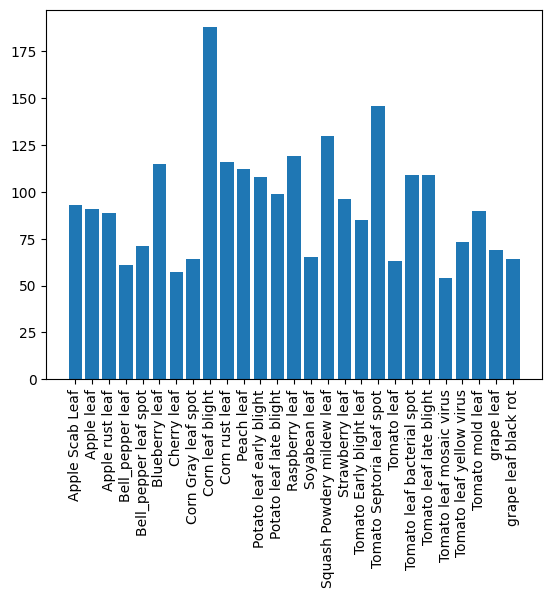

In [5]:
plt.xticks(rotation='vertical')
plt.bar(class_distribution.index, class_distribution.values)

In [ ]:
# ------------------------------------------------------------------------------------

In [6]:
# example
# plt.bar(["test", "demo", "placeholder"], [6, 4, 2], bottom=[1,2,3])
# plt.bar(["test", "demo", "lorem ipsum"], [1, 1, 1], bottom=[7, 6, 5])
# plt.legend([1,2,3])

In [43]:
df_full = pd.read_csv("../datasets/intermediate-features/PAD_UFES_20-ResNet50-Random.csv", index_col=0)
print(df_full.columns)

Index(['target_code', 'set', '0', '1', '2', '3', '4', '5', '6', '7',
       ...
       '2038', '2039', '2040', '2041', '2042', '2043', '2044', '2045', '2046',
       '2047'],
      dtype='object', length=2050)


In [44]:
df_full.groupby(["target_code","set"])["set"].count()

target_code  set  
ACK          test      67
             train    577
             valid     78
BCC          test      77
             train    672
             valid     84
MEL          test       5
             train     39
             valid      8
NEV          test      24
             train    193
             valid     26
SCC          test      12
             train    147
             valid     24
SEK          test      25
             train    188
             valid     20
Name: set, dtype: int64

In [51]:
df_train = df_full[df_full["set"] == "train"]
df_valid = df_full[df_full["set"] == "valid"]
df_test = df_full[df_full["set"] == "test"]

target_group = df_train.groupby("target_code")
df_train = target_group.sample(
    42, random_state=19, replace=True
)

df_train_features = df_train.loc[:, ~df_train.columns.isin(["target_code", "set"])]
df_valid_features = df_valid.loc[:, ~df_valid.columns.isin(["target_code", "set"])]
df_test_features = df_test.loc[:, ~df_test.columns.isin(["target_code", "set"])]

# scaler = StandardScaler()
# train_features = scaler.fit_transform(df_train_features)
# valid_features = scaler.transform(df_valid_features)
# test_features = scaler.transform(df_test_features)

train_features = df_train_features.to_numpy()
valid_features = df_valid_features.to_numpy()
test_features = df_test_features.to_numpy()

train_targets = df_train["target_code"].to_numpy()
valid_targets = df_valid["target_code"].to_numpy()
test_targets = df_test["target_code"].to_numpy()

In [52]:
model_lr = LogisticRegression(max_iter=10000)
model_lr.fit(train_features, train_targets)

In [53]:
valid_pred = model_lr.predict(valid_features)
test_pred = model_lr.predict(test_features)

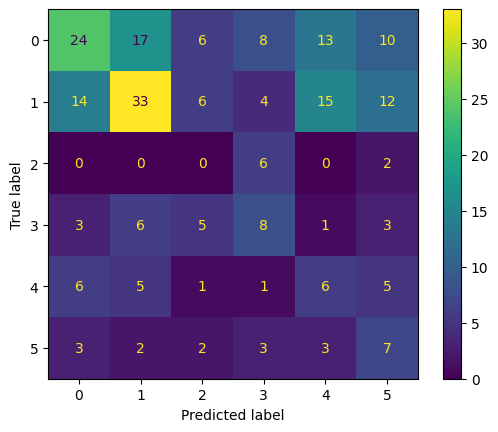

In [55]:
cm = confusion_matrix(valid_targets, valid_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

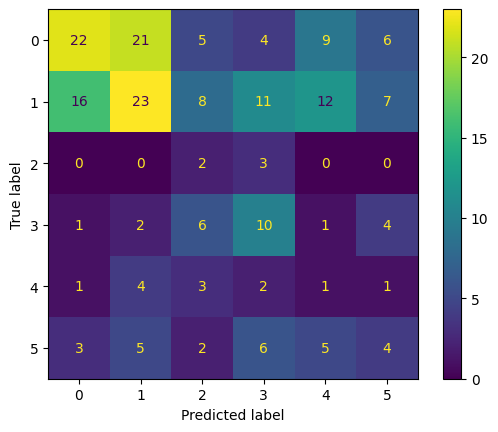

In [56]:
cm = confusion_matrix(test_targets, test_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()